# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science

*Jake VanderPlas*

*University of Washington eScience Institute*


#### Define Function to use Existing Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve

import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True) 
    data.columns = ['Total', 'East Sidewalk', 'West Sidewalk']
    return data

In [3]:
data = get_fremont_data()
data.head()

,Total,East Sidewalk,West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


#### Visualization
Hourly counts over the years  
Re-sample by week

<AxesSubplot:xlabel='Date'>

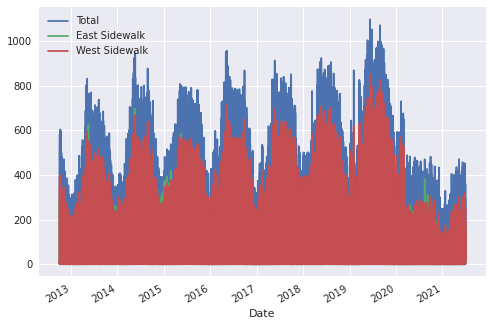

In [4]:
data.plot()

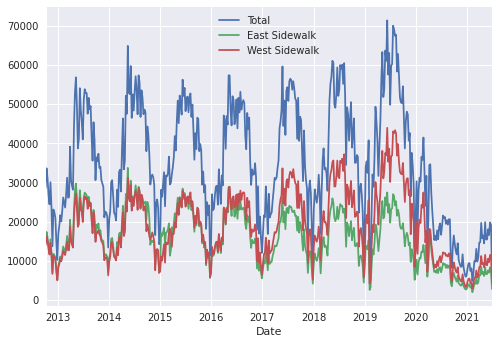

In [5]:
data.resample('W').sum().plot();

#### Annual Trends in # of Riders
Re-sample daily, rolling window, sum over 365 days of data  
Group by time of day, take the mean, and plot


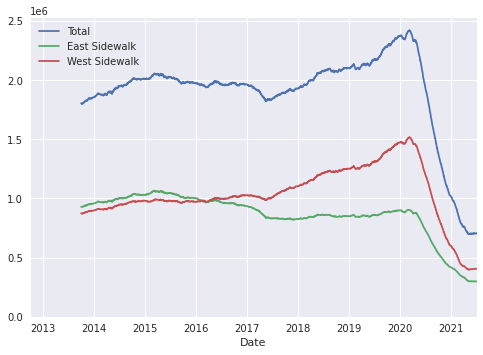

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

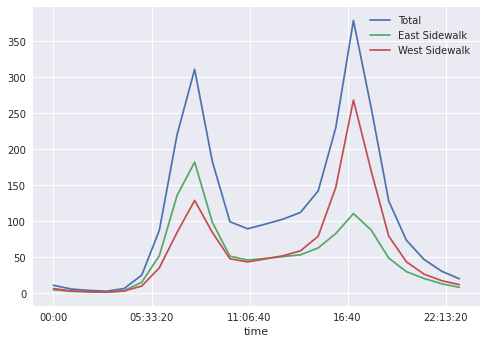

In [7]:
data.groupby(data.index.time).mean().plot();

#### Pivoted Dataset to see the Whole Dataset
Two dimensional data frame where each columns is a day and each row is an hour during that day  
A line for each day of the year

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

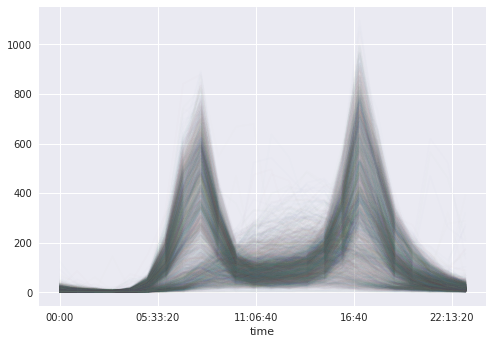

In [9]:
pivoted.plot(legend=False, alpha=0.01)